<a href="https://colab.research.google.com/github/artjow/-/blob/main/%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[ 워드클라우드를 이용한 작가별 인터뷰 답변내용 시각화 ]**

In [254]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving Comprehensive image.jpg to Comprehensive image (1).jpg
User uploaded file "Comprehensive image.jpg" with length 648648 bytes


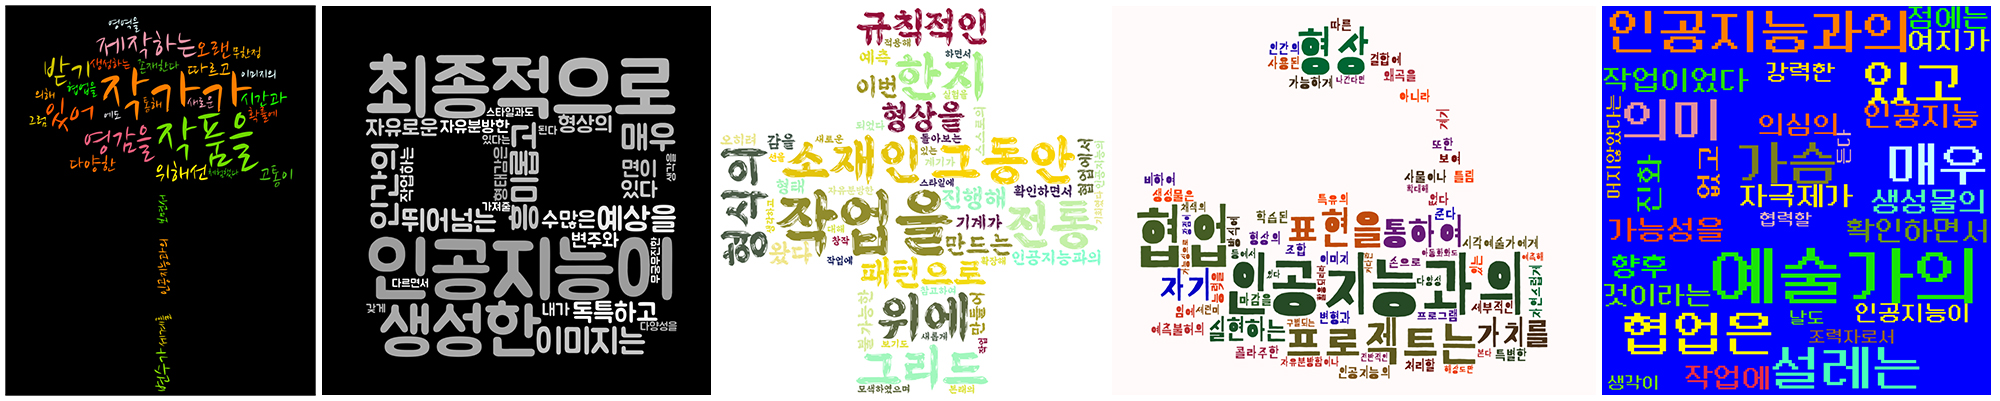

In [257]:
from IPython.display import Image
Image('/content/Comprehensive image.jpg')

'''
김창겸)
작가가 작품을 제작하는 데 있어 영감을 받기 위해선 오랜 시간과 고통이 따르고 다양한 변수가 존재한다. 
그럼 에도 인공지능과의 협업을 통해 확률에 의해 무한정 생성하는 이미지의 세계를 보면서 새로운 영역을 체험했다.

양대원)
인공지능이 최종적으로 생성한 이미지는 매우 흥미롭고 인간의 예상을 뛰어넘는 독특하고 자유로운 면이 있다. 
수많은 형상의 변주와 자유분방한 형태감은 내가 작업하는 스타일과도 다르면서 무궁무진한 다양성을 
가져줄 수 있다는 생각을 갖게 된다.

유한이)
그동안 전통 소재인 한지 위에 그리드 형식의 규칙적인 패턴으로 형상을 만드는 작업을 진행해 왔다. 
이번 인공지능과의 협업에서 기계가 만들어 낸 예측 불가능한 형태 감을 확인하면서 오히려 
스스로의 작업을 돌아보는 계기가 되었다. 인공지능의 자유분방한 선을 참고하여 작업에 적용해 
보기도 하면서 새로운 창작 실험을 모색하였으며, 본래의 작업 스타일에 대해 새롭게 생각하고 
확장해 볼 수 있는 기회였다.

이돈순)
인공지능과의 협업 프로젝트는 형상 표현을 통하여 자기 가치를 실현하는 시각예술가에게 특별한 계기 임에 틀림 없다.
학습된 인공지능의 생성물은 인간의 손으로 콜라주한 사물이나 형상의 조합 방식에 비하여 예측불허의 변형과 왜곡을 
가능하게 할 뿐 아니라, 이미지 결합에 따른 세부적인 마감을 자연스럽게 처리할 수 있는 능력을 보여 준다. 
또한 사용된 프로그램 특유의 자유분방함이나 다양성, 채색의 세련미 등에서 볼 때 아동화와도 구별되는 장점이 있다. 
전반적인 해상도만 확대해 나간다면 커다란 가능성으로 활용되리라 예측해 본다. 

홍경택)
인공지능과의 협업은 매우 의미 있고 가슴 설레는 작업이었다. 인공지능 생성물의 진화 가능성을 확인하면서 
향후 예술가의 작업에 자극제가 될 것이라는 점에는 의심의 여지가 없고, 인공지능이 예술가의 강력한 조력자로서 
협력할 날도 머지않았다는 생각이 든다. 

'''

In [139]:
!pip install konlpy #KoNLPy(코엔엘파이)는 한국어 정보처리를 위한 파이썬 패키지

In [140]:
import requests #HTTP 라이브러리
import pandas as pd #pandas는 데이타 분석(Data Analysis)을 위해 널리 사용되는 파이썬 라이브러리 패키지
from bs4 import BeautifulSoup #HTML 문서를 분석 할 수 있는 라이브러리
import matplotlib.pyplot as plt #Matplotlib는 Python에서 정적, 애니메이션 및 대화형 시각화를 만들기 위한 포괄적인 라이브러리
import nltk #엔엘티케이(NLTK)는 자연어 처리를 위한 파이썬 패키지
from konlpy.tag import Kkma #Kkma(꼬꼬마)는 형태소 분석기
from konlpy.tag import Twitter #Twitter(트위터)는 형태소 분석기
from wordcloud import WordCloud #WordCloud(워드 클라우드)란 문서의 키워드, 개념 등을 직관적으로 파악할 수 있도록 핵심 단어를 시각화하는 기법

In [141]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq  #코랩에서 한글 표기를 위해 폰트 설치(리눅스)

In [142]:
from wordcloud import WordCloud

wc = WordCloud(font_path='C:\\Windows\\Fonts\\08SeoulNamsanB_0.ttf', \
	background_color="white", \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)

'''
font_path : 한글 폰트의 경로
background_color : 배경 색 지정
width : 가로폭 지정
height : 세로폭 지정
max_words : 이미지에 넣을 최대 word 수를 지정
max_font_size : 이미지에 넣을 최대 폰트 크기를 지정
'''

'\nfont_path : 한글 폰트의 경로\nbackground_color : 배경 색 지정\nwidth : 가로폭 지정\nheight : 세로폭 지정\nmax_words : 이미지에 넣을 최대 word 수를 지정\nmax_font_size : 이미지에 넣을 최대 폰트 크기를 지정\n'

In [143]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

'''
한글 Word Cloud를 사용하기 위해서 3개의 모듈을 가져온다.
'''

'\n한글 Word Cloud를 사용하기 위해서 3개의 모듈을 가져온다.\n'

#설문조사: 가장 선호하는 이미지 및 그 이유

In [144]:
file = open("/content/Data visualization example.txt", 'r')  #'r' : 파일을 수정('w')은 안하고 읽기만 하겠다.
lists = file.readlines() 
file.close() 
lists

['Q4. 가장 선호하는 이미지 및 그 이유\t\t\n',
 'No\t이유\t\n',
 '1\t4\t익숙함\n',
 '2\t42\t작가의 의도와 인공지능의 우연의 결합\n',
 '3\t14\t경계가 모호한 세상에 있는 듯한 느낌이 좋아서요.\n',
 '4\t2\t예뻐요\n',
 '5\t72\t그림이미지 완성도가 높다\n',
 '6\t90\t작가의 기존 작업의 느낌이 가장 유지되면서 새로운 이미지로 보이기 때문에\n',
 '7\t2\t작품 이미지가 잔상에 깊게 남아서\n',
 '8\t32\t작가 진술과 맥락이 잘 맞는 것 같다고 생각하며 학습 중 우연이겠지만 가면의 형상이 욕망이라는 검은 덩어리와 엮이며 섞이는 것이 묘한 느낌을 보여주는 것 같다.\n',
 '9\t\t패쓰\n',
 '10\t24\t작가의 한계를 넘었다.\n',
 '11\t25\t작가의 진술을 반영하여 표현된 생성물의 느낌이 감정적으로 다가온다. 작가의 잘 정제된 표현과 달리 허물어진 형상성이 강한 인상을 준다.\n',
 '12\t36\t작업 밀도가 우수하다\n',
 '13\t\t패쓰\n',
 '14\t26\t인간 삶의 다양성 변화가 느껴져서\n',
 '15\t43\t원작과 같은 흐름이면서도 다른 스타일이 새롭다.\n',
 '16\t28\t알수 없는 그림이 신비롭게 느껴져서\n',
 '17\t2\t꽃이 진짜 같아요.\n',
 '18\t36\t다양한 이미지가 스토리처럼 느껴짐\n',
 '19\t42\t\n',
 '20\t44\t원작가의 작품을 보고 원작과 다른 작품으로 느껴져서\n',
 '21\t62\t멀리서 보면 사진 같은데 가까이서 보면 실제와는 다른 이미지인 것이 흥미롭고 신기했고 노을이 떠오르는 색감이 예뻐 보였다.\n',
 '22\t32\t익살스러우면서도 즐거운 느낌이 좋다. 슬픔이 있는 듯해도 그래도 즐거운 마음을 갖게 되는 모습\n',
 '23\t48\t\n',
 '24\t80\t기억에 남아서\n',
 '25\t97\t현재 우리의 복잡한 삶의 생각을 느끼게 한다.\n',
 '26\t2\

In [145]:
#형태소 나누기

twitter = Twitter()
morphs = []
for sentence in lists:
  morphs.append(twitter.pos(sentence))
print(morphs)

'''
morphs = [] morphs라는 빈 리스트를 만들고 그 리스트에 추가(append)한다.
추가하는 것은
lists에 있는 글(sentence)의 형태소를 분석한(twitter) 결과를 추가. 

결과는 위와 같이 출력된다. 
조사, 명사, 부사 등등 단어와 형태로 나누어 리스트가 형성되었다. 

여기서 워드 클라우드에 넣을 것은 명상, 형용사 부사까지로 한다. 

'''

[[('Q', 'Alpha'), ('4', 'Number'), ('.', 'Punctuation'), ('가장', 'Noun'), ('선호', 'Noun'), ('하는', 'Verb'), ('이미지', 'Noun'), ('및', 'Noun'), ('그', 'Noun'), ('이유', 'Noun'), ('\t\t\n', 'Foreign')], [('No', 'Alpha'), ('\t', 'Foreign'), ('이유', 'Noun'), ('\t\n', 'Foreign')], [('1', 'Number'), ('\t', 'Foreign'), ('4', 'Number'), ('\t', 'Foreign'), ('익숙함', 'Adjective'), ('\n', 'Foreign')], [('2', 'Number'), ('\t', 'Foreign'), ('42', 'Number'), ('\t', 'Foreign'), ('작가', 'Noun'), ('의', 'Josa'), ('의도', 'Noun'), ('와', 'Josa'), ('인공', 'Noun'), ('지능', 'Noun'), ('의', 'Josa'), ('우연', 'Noun'), ('의', 'Josa'), ('결합', 'Noun'), ('\n', 'Foreign')], [('3', 'Number'), ('\t', 'Foreign'), ('14', 'Number'), ('\t', 'Foreign'), ('경계', 'Noun'), ('가', 'Josa'), ('모호한', 'Adjective'), ('세상', 'Noun'), ('에', 'Josa'), ('있는', 'Adjective'), ('듯', 'Noun'), ('한', 'Josa'), ('느낌', 'Noun'), ('이', 'Josa'), ('좋아서요', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign')], [('4', 'Number'), ('\t', 'Foreign'), ('2', 'Number'), ('\t', 'F

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


'\nmorphs = [] morphs라는 빈 리스트를 만들고 그 리스트에 추가(append)한다.\n추가하는 것은\nlists에 있는 글(sentence)의 형태소를 분석한(twitter) 결과를 추가. \n\n결과는 위와 같이 출력된다. \n조사, 명사, 부사 등등 단어와 형태로 나누어 리스트가 형성되었다. \n\n여기서 워드 클라우드에 넣을 것은 명상, 형용사 부사까지로 한다. \n\n'

In [146]:
#명사, 형용사, 부사만 골라내기

noun_adj_adv_list=[] 

for sentence in morphs : 
   for word, tag in sentence : 
     if tag in ['Noun'] and ("것" not in word) and ("내" not in 
word)and ("나" not in word)and ("수"not in word) and("게"not in 
word)and("말"not in word): 
        noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)

'''
*sentence는 for 함수 안에서만 쓰이는 변수라 sentence와는 상관없다. 
위에서 morph라는 리스트를 만들었고 이 리스트 안에는 쉼표로 구분된 두 가지 데이터가 담겨있다. 
ex) ('기차','Noun')
word와 tag라고 변수를 붙여주면 word는 앞의 단어(기차), tag는 뒤의 단어(Noun)와 연결된다. 

만약(if) tag 안에 명사, 형용사, 부사['Noun','Adjective','Adverb']가 있으면
빈 리스트(noun_adj_adv_list)에 앞의 단어(word)를 추가(append)한다.  

워드 클라우드 결과에 도움이 되지 않는 '것', '나', '내' 는 제외한다.
결과는 만든 조건에 충족하는 word만 출력

'''


['가장', '선호', '이미지', '및', '그', '이유', '이유', '작가', '의도', '인공', '지능', '우연', '결합', '경계', '세상', '듯', '느낌', '그림', '이미지', '완성', '도', '작가', '기존', '작업', '느낌', '가장', '유지', '이미지', '때문', '작품', '이미지', '잔', '남아', '작가', '진술', '맥락', '생각', '학습', '중', '우연', '가면', '형상', '욕망', '덩어리', '엮', '묘', '느낌', '패쓰', '작가', '한계', '작가', '진술', '반영', '표현', '생', '물의', '느낌', '감정', '작가', '정제', '표현', '달리', '허물', '어진', '형상', '인상', '작업', '밀도', '패쓰', '인간', '삶', '다양성', '변화', '원작', '다른', '스타일', '그림', '꽃', '진짜', '이미지', '스토리', '작가', '작품', '보고', '원작', '다른', '작품', '멀리', '사진', '가까이', '실제', '다른', '이미지', '흥미', '노을', '색감', '느낌', '슬픔', '듯', '마음', '모습', '기억', '남아', '현재', '우리', '삶', '생각', '색깔', '장미', '인공', '지능', '작가', '성향', '변화', '비', '대칭', '개', '캐릭터', '대비', '표정', '매력', '이미지', '시선', '강탈', '사이버', '색감', '재개발', '우울함', '시선', '작품', '컬러', '조합', '색감', '바다', '하늘', '모습', '마음속', '응어리', '느낌', '상처', '손짓', '표현', '느낌', '꽃', '만발', '사람', '그린', '느낌', '임', '색감', '기존', '작가', '스타일', '기존', '작가', '스타일', '연장', '선의', '작업', '색감', '그림', '체', '선택', '가장', '눈', '색감', '활

"\n*sentence는 for 함수 안에서만 쓰이는 변수라 sentence와는 상관없다. \n위에서 morph라는 리스트를 만들었고 이 리스트 안에는 쉼표로 구분된 두 가지 데이터가 담겨있다. \nex) ('기차','Noun')\nword와 tag라고 변수를 붙여주면 word는 앞의 단어(기차), tag는 뒤의 단어(Noun)와 연결된다. \n\n만약(if) tag 안에 명사, 형용사, 부사['Noun','Adjective','Adverb']가 있으면\n빈 리스트(noun_adj_adv_list)에 앞의 단어(word)를 추가(append)한다.  \n\n워드 클라우드 결과에 도움이 되지 않는 '것', '나', '내' 는 제외한다.\n결과는 만든 조건에 충족하는 word만 출력\n\n"

In [147]:
#빈도수대로 정렬하기 
count = Counter(noun_adj_adv_list)

'''
Counter는 위에서 말했듯이 카운팅 해주는 패키지.  이를 만든 최종 리스트(noun_adj_adv_list)에 적용시킨다. 
'''


'\nCounter는 위에서 말했듯이 카운팅 해주는 패키지.  이를 만든 최종 리스트(noun_adj_adv_list)에 적용시킨다. \n'

In [148]:
words = dict(count.most_common())

'''
리스트에서 빈도수대로 단어를 정렬(most_common)하고 이를 딕셔너리(dict) 형태로 출력한다.
단어와 빈도수가 함께 나오는 딕셔너리가 만들어졌다. 
'''


'\n리스트에서 빈도수대로 단어를 정렬(most_common)하고 이를 딕셔너리(dict) 형태로 출력한다.\n단어와 빈도수가 함께 나오는 딕셔너리가 만들어졌다. \n'

In [149]:
words

{'가까이': 1,
 '가면': 1,
 '가장': 3,
 '감정': 1,
 '강탈': 1,
 '개': 1,
 '결합': 1,
 '경계': 1,
 '공간': 1,
 '그': 1,
 '그린': 1,
 '그림': 3,
 '기억': 1,
 '기존': 3,
 '꽃': 2,
 '남아': 2,
 '노을': 1,
 '눈': 1,
 '느낌': 9,
 '다른': 3,
 '다양성': 1,
 '달리': 1,
 '대비': 1,
 '대칭': 1,
 '덩어리': 1,
 '도': 1,
 '듯': 2,
 '때문': 1,
 '마음': 1,
 '마음속': 1,
 '만발': 1,
 '매력': 1,
 '맥락': 1,
 '멀리': 1,
 '모습': 2,
 '몰입': 1,
 '묘': 1,
 '물의': 1,
 '밀도': 1,
 '및': 1,
 '바다': 1,
 '반영': 1,
 '변화': 2,
 '보고': 1,
 '비': 1,
 '사람': 1,
 '사이버': 1,
 '사진': 1,
 '삶': 2,
 '상처': 1,
 '색감': 6,
 '색깔': 1,
 '생': 1,
 '생각': 2,
 '선의': 1,
 '선택': 1,
 '선호': 1,
 '성향': 1,
 '세상': 1,
 '손짓': 1,
 '스타일': 3,
 '스토리': 1,
 '슬픔': 1,
 '시선': 2,
 '실제': 1,
 '어진': 1,
 '엮': 1,
 '연장': 1,
 '완성': 1,
 '욕망': 1,
 '우리': 1,
 '우연': 2,
 '우울함': 1,
 '원작': 2,
 '유지': 1,
 '응어리': 1,
 '의도': 1,
 '이미지': 8,
 '이유': 2,
 '인간': 1,
 '인공': 2,
 '인상': 1,
 '임': 1,
 '작가': 10,
 '작업': 3,
 '작품': 4,
 '잔': 1,
 '장미': 1,
 '재개발': 1,
 '정제': 1,
 '조합': 1,
 '중': 1,
 '지능': 2,
 '진술': 2,
 '진짜': 1,
 '체': 1,
 '캐릭터': 1,
 '컬러': 1,
 '패쓰': 2,
 '표정': 1,
 '표

**워드 클라우드 만들기 - 디스플레이 설정 **

In [150]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

'''
* wordcloud 패키지도 설치해주어야 한다.(아나콘다 프롬프트에 pip install wordcloud(아니면 WordCloud) 치면 됨) 
nltk(형태소 분석 패키지)
'''

'\n* wordcloud 패키지도 설치해주어야 한다.(아나콘다 프롬프트에 pip install wordcloud(아니면 WordCloud) 치면 됨) \nnltk(형태소 분석 패키지)\n'

In [151]:
%matplotlib inline 

import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 

set_matplotlib_formats('retina') 

matplotlib.rc('axes',unicode_minus = False)

'''
%matplotlib inline 아래 모든 코드는 그래프의 디스플레이에 설정에 관한 것이다.
font는 Malgun Gothic , 그래프가 한글일 경우 선명하게 나오지 않아 선명하게 하기('retina')
제일 아랫줄은 그래프에 음수의 수치를 보여줄 때 오류가 나는 것을 방지하는 코드라 굳이 안 적어도 상관 없다. 
'''

"\n%matplotlib inline 아래 모든 코드는 그래프의 디스플레이에 설정에 관한 것이다.\nfont는 Malgun Gothic , 그래프가 한글일 경우 선명하게 나오지 않아 선명하게 하기('retina')\n제일 아랫줄은 그래프에 음수의 수치를 보여줄 때 오류가 나는 것을 방지하는 코드라 굳이 안 적어도 상관 없다. \n"

**워드 클라우드 만들기 - 워드 클라우드 최종 코드 **

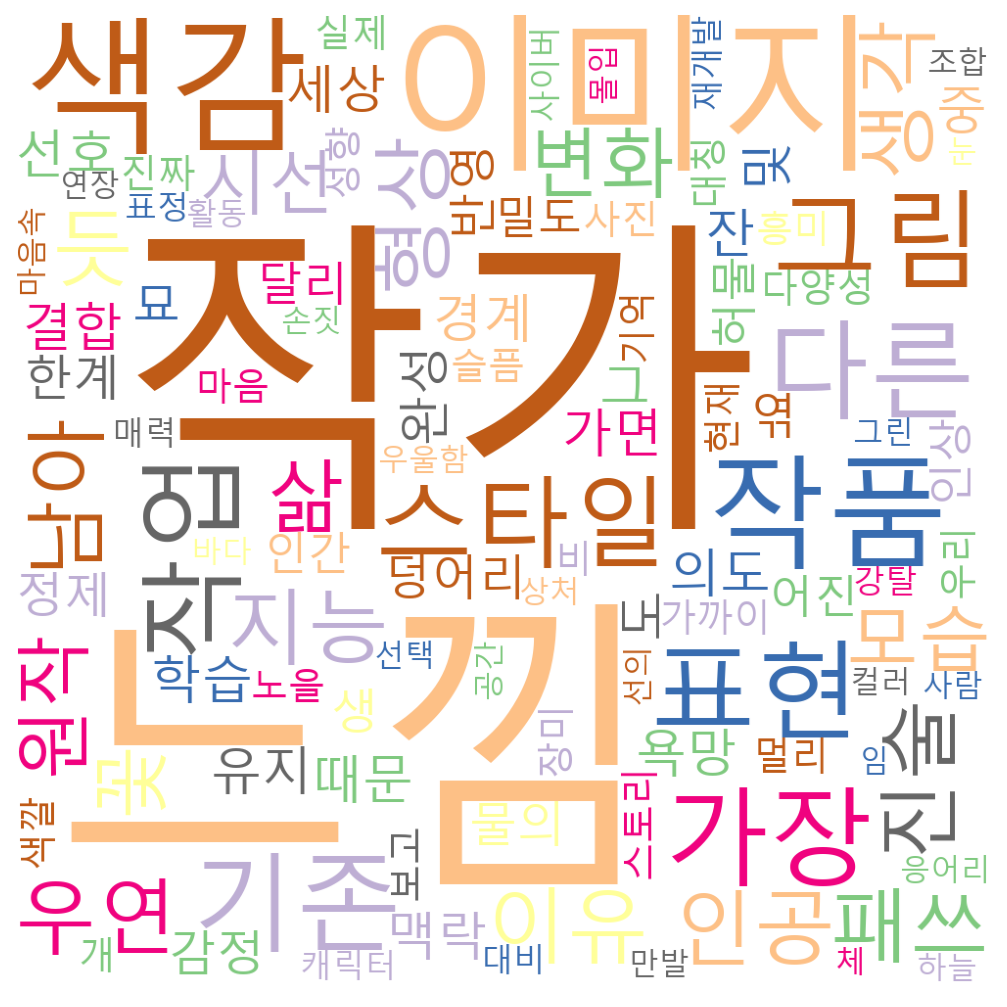

In [157]:

wordcloud = WordCloud(font_path = '/content/Malgun-Gothic.ttf', 
background_color='white',colormap = "Accent_r", 
                    width=1000, 
height=1000).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# *설문에 대한 작가별 인터뷰 답변내용*

In [153]:
import random
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)

# 양대원 작가
인공지능이 최종적으로 생성한 이미지는 매우 흥미롭고 인간의 예상을 뛰어넘는 독특하고 자유로운 면이 있다. 

수많은 형상의 변주와 자유분방한 형태감은 내가 작업하는 스타일과도 다르면서 

무궁무진한 다양성을 가져줄 수 있다는 생각을 갖게 된다.

(-0.5, 1416.5, 1416.5, -0.5)

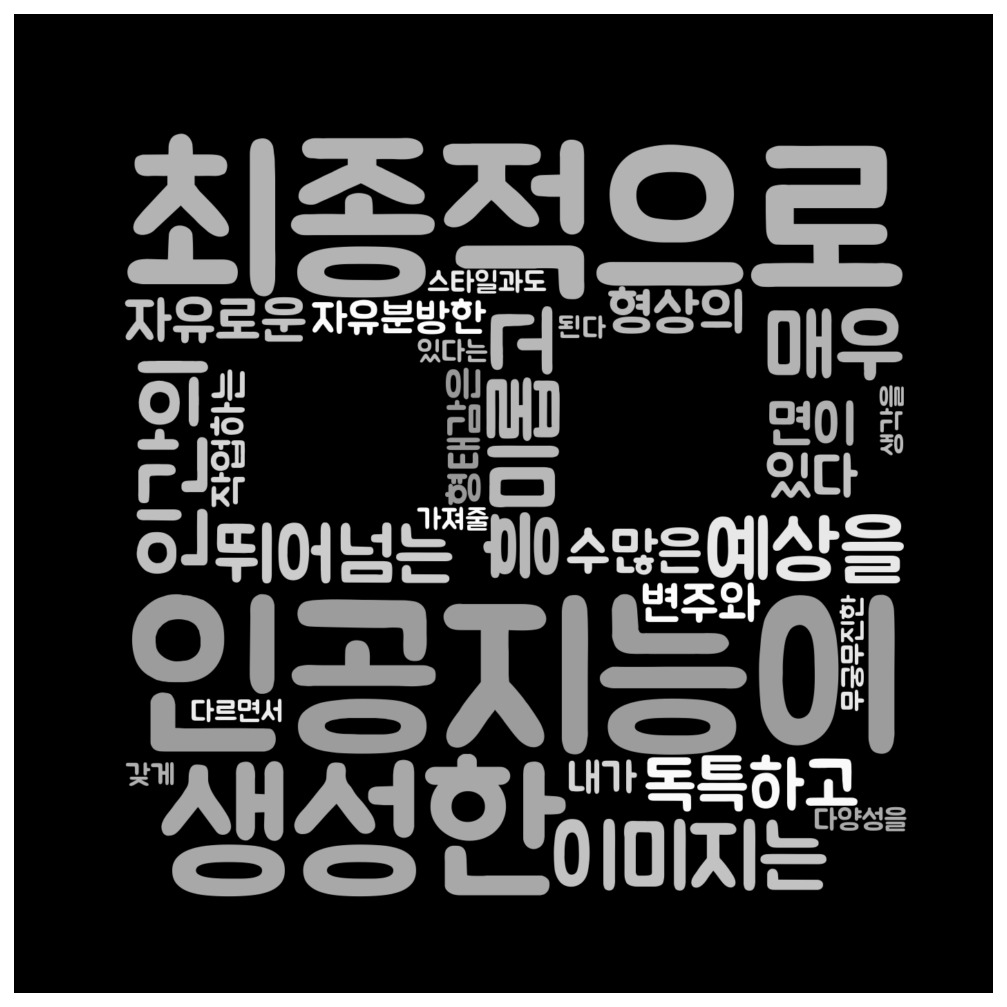

In [186]:
# Custom Color Function
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

script = open("/content/Write_YDW01.txt").read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("will")
mask = np.array(Image.open("/content/YDW02.png"))

wc = WordCloud(background_color="black", stopwords=stopwords, mask=mask,
               width=875, height=620,  font_path="BMJUA_ttf.ttf")
wc.generate(script)
plt.figure()
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), 
            interpolation="bilinear")
plt.axis("off")

# 유한이 작가
그동안 전통 소재인 한지 위에 그리드 형식의 규칙적인 패턴으로 형상을 만드는 작업을 진행해 왔다. 

이번 인공지능과의 협업에서 기계가 만들어 낸 예측 불가능한 형태 감을 확인하면서 오히려 스스로의 작업을 돌아보는 계기가 되었다. 

인공지능의 자유분방한 선을 참고하여 작업에 적용해 보기도 하면서 새로운 창작 실험을 모색하였으며, 

본래의 작업 스타일에 대해 새롭게 생각하고 확장해 볼 수 있는 기회였다.

In [162]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)

(-0.5, 1023.5, 1023.5, -0.5)

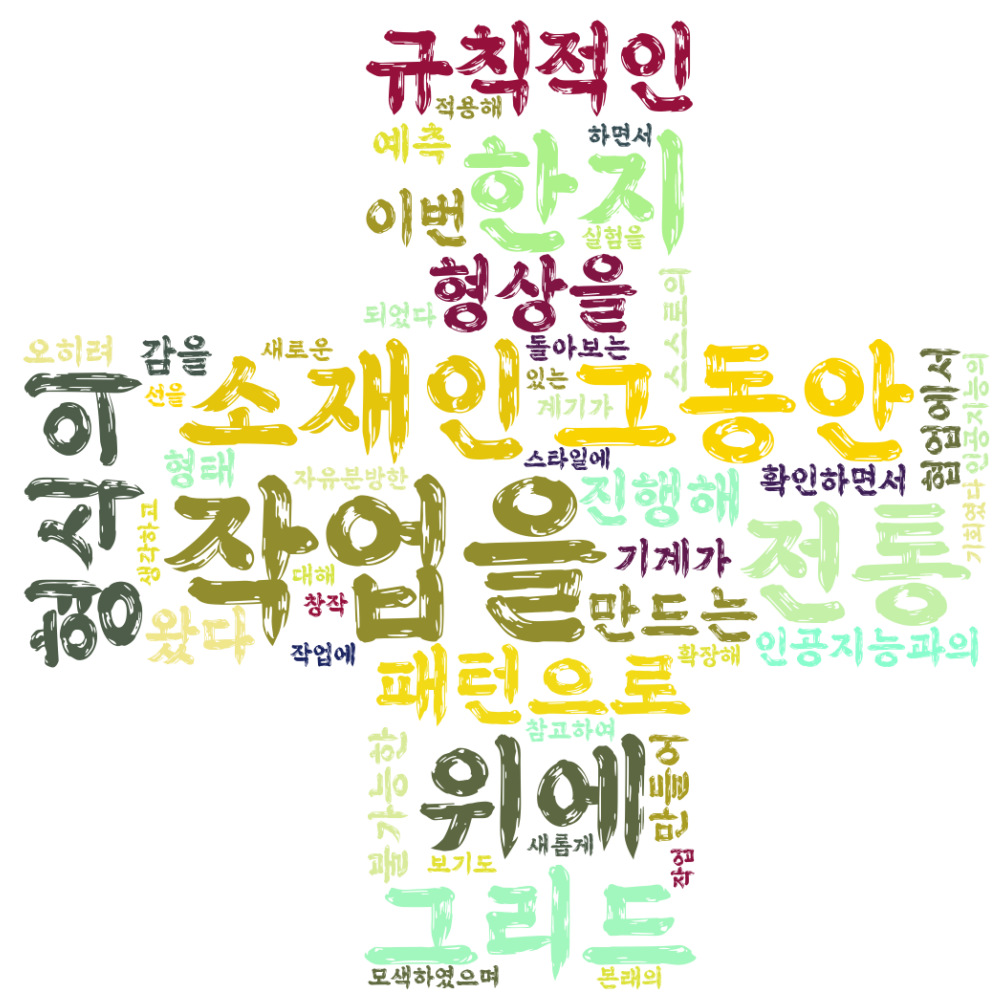

In [221]:
mask = np.array(Image.open("/content/YHL03.png"))
# Reading the script
script = open("/content/Write_YHL.txt").read()
# Set of Stop words
stopwords = set(STOPWORDS)
stopwords.add("will")

from matplotlib.colors import LinearSegmentedColormap
colors = ["#BF0A30", "#002868", "#FFD700", "#7FFFD4", "#F0E68C"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Create WordCloud Object
wc = WordCloud(background_color="white", stopwords=stopwords,
                 font_path="BMEuljiro10yearslater.ttf", 
               width=853, height=506, mask=mask, colormap=cmap)
wc.generate(script)


plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# 이돈순 작가
인공지능과의 협업 프로젝트는 형상 표현을 통하여 자기 가치를 실현하는 시각예술가에게 특별한 계기 임에 틀림 없다.

학습된 인공지능의 생성물은 인간의 손으로 콜라주한 사물이나 형상의 조합 방식에 비하여 예측불허의 변형과 왜곡을 

가능하게 할 뿐 아니라, 이미지 결합에 따른 세부적인 마감을 자연스럽게 처리할 수 있는 능력을 보여 준다. 

또한 사용된 프로그램 특유의 자유분방함이나 다양성, 채색의 세련미 등에서 볼 때 아동화와도 구별되는 장점이 있다. 

전반적인 해상도만 확대해 나간다면 커다란 가능성으로 활용되리라 예측해 본다. 

(-0.5, 1306.5, 1049.5, -0.5)

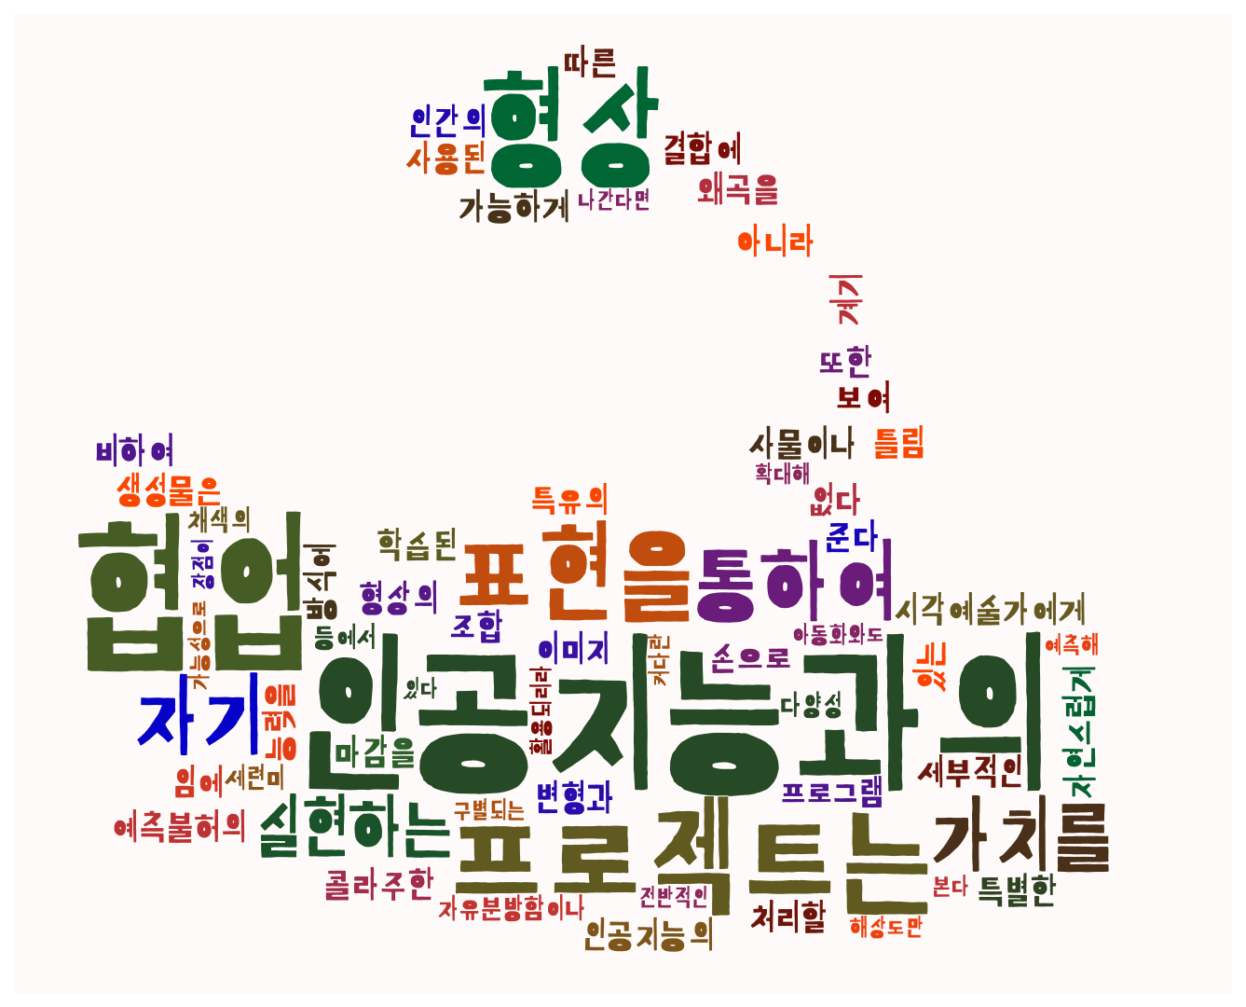

In [227]:
mask = np.array(Image.open("/content/LDS.jpg"))
# Reading the script
script = open("/content/Write_LDS.txt").read()
# Set of Stop words
stopwords = set(STOPWORDS)
stopwords.add("will")

from matplotlib.colors import LinearSegmentedColormap
colors = ["#8B0000", "#006633","#FF4500","#0000CD"]
cmap = LinearSegmentedColormap.from_list("jet", colors)

# Create WordCloud Object
wc = WordCloud(background_color="snow", stopwords=stopwords,
                 font_path="BMKIRANGHAERANG-OTF.otf",
               width=1306, height=885, mask=mask, colormap=cmap)
wc.generate(script)


plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# 김창겸 작가
작가가 작품을 제작하는 데 있어 영감을 받기 위해선 오랜 시간과 고통이 따르고 다양한 변수가 존재한다.
 
그럼 에도 인공지능과의 협업을 통해 확률에 의해 무한정 생성하는 이미지의 세계를 보면서 새로운 영역을 체험했다.

(-0.5, 1023.5, 1286.5, -0.5)

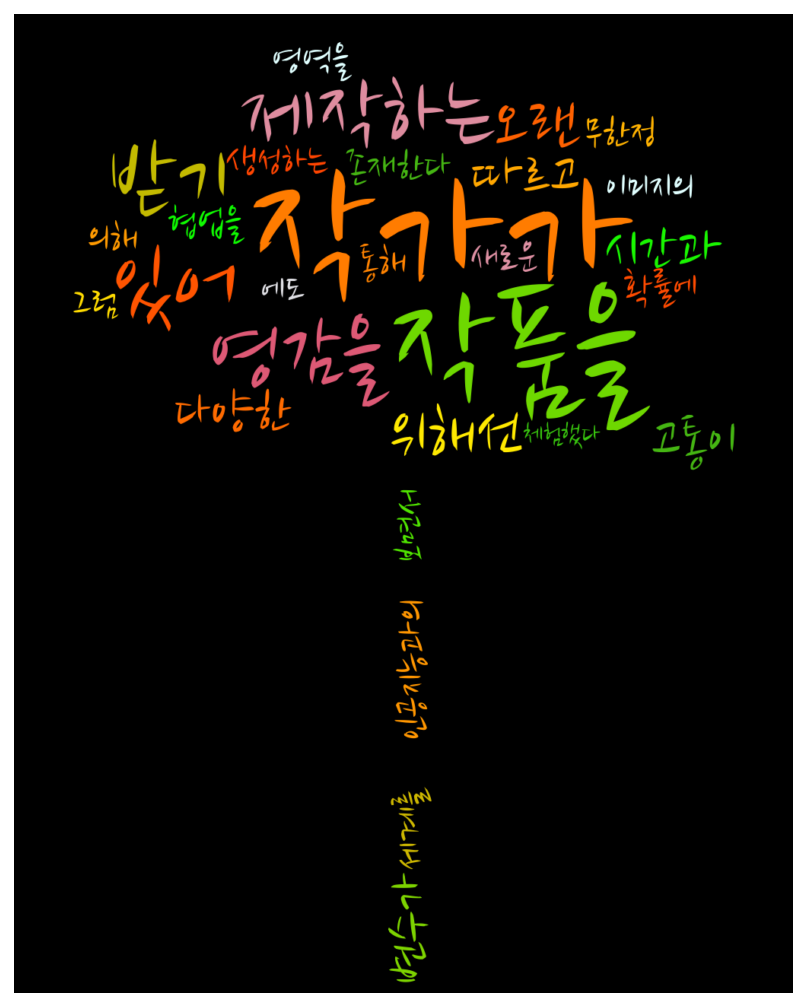

In [238]:
mask = np.array(Image.open("/content/KCK.jpg"))
# Reading the script
script = open("/content/Write_KCK.txt").read()
# Set of Stop words
stopwords = set(STOPWORDS)
stopwords.add("will")

from matplotlib.colors import LinearSegmentedColormap
colors = ["#FFFF00", "#FF4500","#FFA500","#00FF00","#DC143C","#E0FFFF"]
cmap = LinearSegmentedColormap.from_list("jet", colors)

# Create WordCloud Object
wc = WordCloud(background_color="black", stopwords=stopwords,
                 font_path="Sharing handwriting brush.ttf",
               width=1024, height=1287, mask=mask, colormap=cmap)
wc.generate(script)


plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# 홍경택 작가
인공지능과의 협업은 매우 의미 있고 가슴 설레는 작업이었다. 

인공지능 생성물의 진화 가능성을 확인하면서 향후 예술가의 작업에 자극제가 될 것이라는 점에는 의심의 여지가 없고, 

인공지능이 예술가의 강력한 조력자로서 협력할 날도 머지않았다는 생각이 든다. 

(-0.5, 1023.5, 1023.5, -0.5)

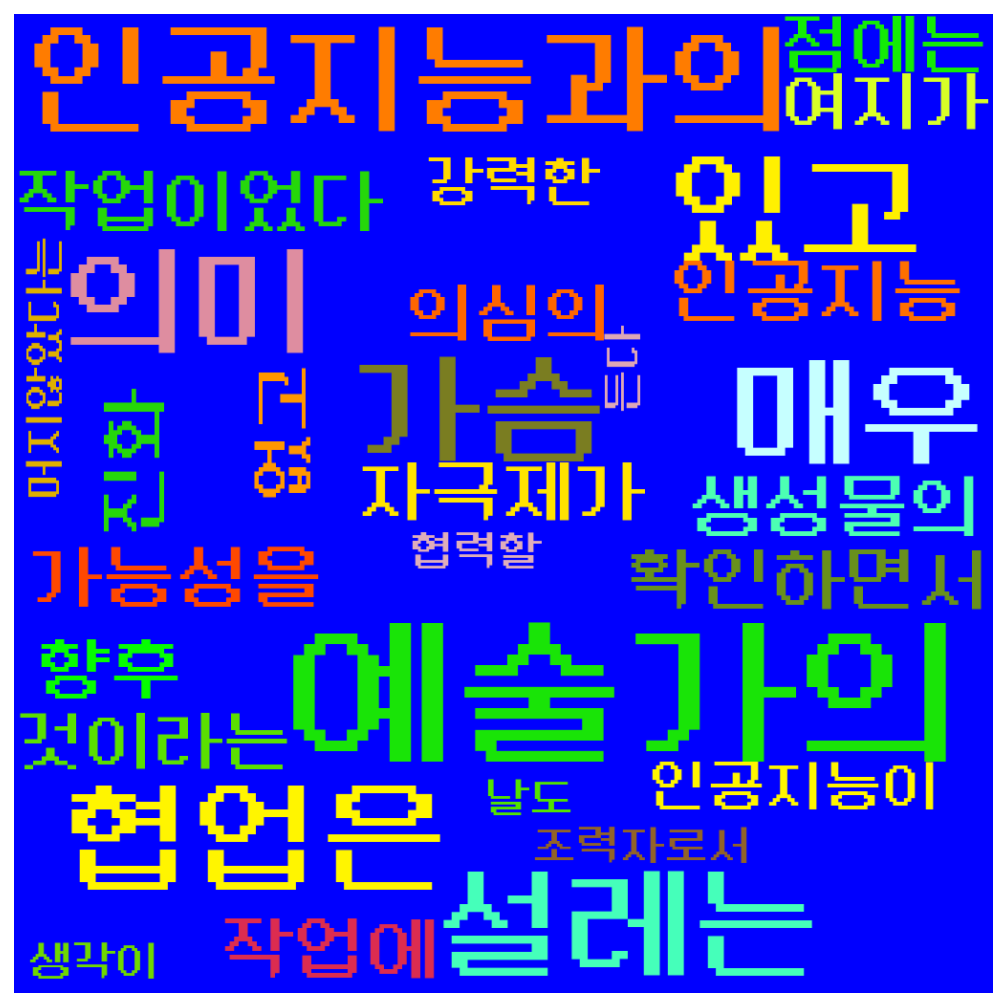

In [250]:
mask = np.array(Image.open("/content/HKT.jpg"))
# Reading the script
script = open("/content/Write_HKT.txt").read()
# Set of Stop words
stopwords = set(STOPWORDS)
stopwords.add("will")

from matplotlib.colors import LinearSegmentedColormap
colors = ["#FF4500","#FFA500","#00FF00","#DC143C","#E0FFFF","#00FFFF","#FFFF00","#FFD700"]
cmap = LinearSegmentedColormap.from_list("jet", colors)

# Create WordCloud Object
wc = WordCloud(background_color="blue", stopwords=stopwords,
                 font_path="DungGeunMo.ttf",
               width=1024, height=1024, mask=mask, colormap=cmap)
wc.generate(script)


plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")